In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#Todos os beams terão a_0 = 1.
#Os restantes parâmetros estarão de acordo com os do artigo em relação ao a_0

#parametros do short beam:

W0_s = 0.04       #spot size
R_s = 0.12        #radius
lambda_s = 0.0165 #wavelength
z_r_s = np.pi * W0_s * W0_s / lambda_s

#parametros do thin beam

W0_t = 0.062      #spot size
lambda_t = 0.0165 #wavelength
L_t = 4.13        #length
z_r_t = np.pi * W0_t * W0_t / lambda_t
a_z_t = 1 / np.sqrt(1 + (L_t/(4 * z_r_t)) * (L_t/(4 * z_r_t)))

#parametros do wide beam

W0_w = 0.41     #spot size
R_w = 1.64      #radius
lambda_w = 0.11 #wavelength
L_w = 6.97      #length
z_r_w = np.pi * W0_w * W0_w / lambda_w
a_z_w = 1 / np.sqrt(1 + (L_w/(4 * z_r_w)) * (L_w/(4 * z_r_w)))

num_pon = 1000000

rng = np.random.default_rng()

In [3]:
#gerar as coordenadas dos eletrões e as suas funções analíticas

coord_t = L_t / 2 * rng.random(num_pon) - L_t / 4  # coordenadas do thin beam

coord_s = np.array([np.random.normal(0, 1 / np.sqrt(2) * R_s,
                       num_pon), np.random.normal(0, 1 / np.sqrt(2) * R_s,
                       num_pon)])                                      #coordenadas do short beam

phi_lst = rng.random(num_pon) * 2*np.pi
radius_lst = np.sqrt(rng.random(num_pon)) * R_w

x_lst = radius_lst * np.cos(phi_lst)
y_lst = radius_lst * np.sin(phi_lst)

coord_w = np.array([radius_lst * np.cos(phi_lst), radius_lst * np.sin(phi_lst), L_w * rng.random(num_pon) - L_w/2]) #coordenadas do wide beam

delta_a = np.array([i/num_pon + 0.01 for i in range(num_pon)])

a_eff_s = np.exp(-(coord_s[0]**2 + coord_s[1]**2)/(W0_s * W0_s))  #vetor potencial do short beam

a_eff_t = 1 / np.sqrt(1 + (coord_t * coord_t)/(z_r_t*z_r_t))  #vetor potencial do thin beam

a_eff_w = np.exp((-(coord_w[0]*coord_w[0] + coord_w[1] * coord_w[1]))/(1 + (coord_w[2] * coord_w[2])/(z_r_w*z_r_w))/(W0_w * W0_w))/np.sqrt(1 + (coord_w[2] * coord_w[2])/(z_r_w*z_r_w)) #vetor potencial do wide beam

func_s = [0 for i in range(num_pon)]

func_t = [0 for i in range(num_pon)]

func_w = [0 for i in range(num_pon)]

func_s = (((W0_s * W0_s)/(delta_a * R_s * R_s))*((delta_a)**((W0_s * W0_s)/(R_s * R_s))))  #função analítica do short beam

for i in tqdm(range(num_pon)):
    if delta_a[i] > a_z_t:
        func_t[i] = (4 * z_r_t * (1/L_t) * (1 / ((delta_a[i]) * (delta_a[i]))) * (1 / np.sqrt(1 - (delta_a[i]) * (delta_a[i]))))   #função analítica do short beam
    else:
        func_t[i] = 0


for i in tqdm(range(num_pon)):
    if delta_a[i] > a_z_w:
        func_w[i] = 0.020 * (4 * np.pi * W0_w * W0_w * z_r_w) / (3 * delta_a[i] * delta_a[i]) * np.sqrt(1 - delta_a[i] * delta_a[i]) * (2 + (1 / (delta_a[i] * delta_a[i])))  #função analítica do wide beam
    else:
        func_w[i] = 0.020 * (4 * np.pi * W0_w * W0_w * z_r_w * L_w) / (4 * delta_a[i] * z_r_w) * (1 + (L_w * L_w)/(16 * z_r_w*z_r_w)/3)

<ipython-input-3-b821c8a52d48>:33: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  for i in tqdm(range(num_pon)):
100%|██████████| 1000000/1000000 [00:08<00:00, 119303.27it/s]


In [4]:
#gerar as curvas da amostragem

def norm(x, y):
    return np.sum(np.array([(x[i+1]-x[i])*y[i] for i in range(len(x)-1)]))

def arraycenter(x):
    return np.array([(x[i]+x[i+1])/2 for i in range(len(x)-1)])

adist_t, adist_t_b = np.histogram(a_eff_t, 100)

adist_t, adist_t_b = adist_t/norm(adist_t_b, adist_t), arraycenter(adist_t_b)

adist_w, adist_w_b = np.histogram(a_eff_w, 100)

adist_w, adist_w_b = adist_w/norm(adist_w_b, adist_w), arraycenter(adist_w_b)

adist_s, adist_s_b = np.histogram(a_eff_s, 100)

adist_s, adist_s_b = adist_s/norm(adist_s_b, adist_s), arraycenter(adist_s_b)

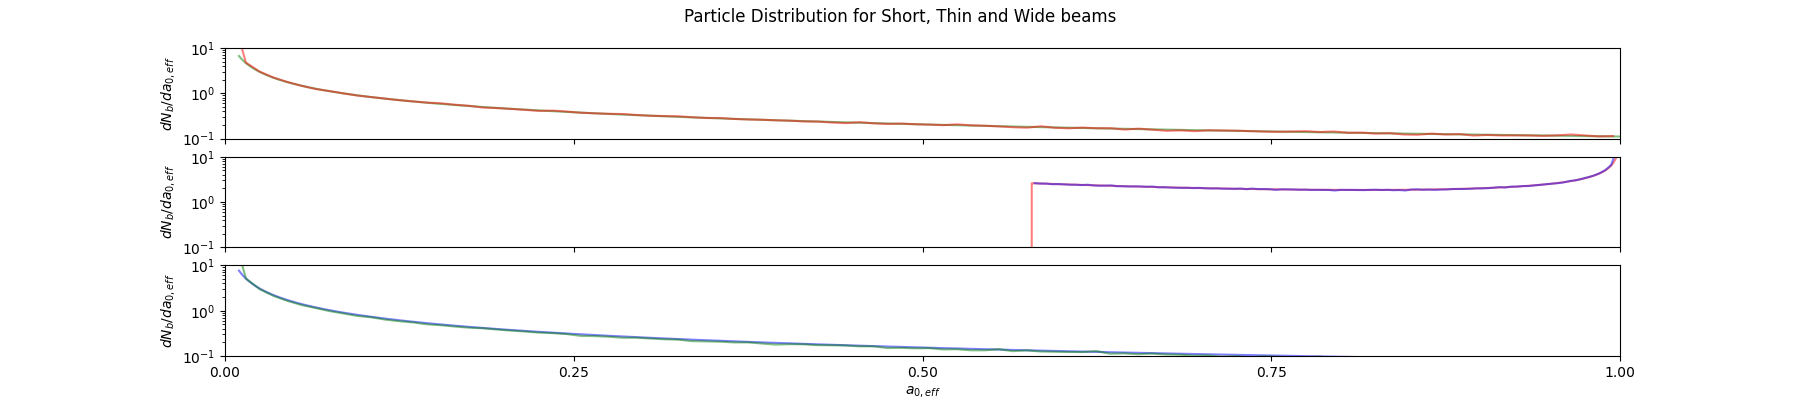

In [5]:
#gerar os gráficos

figure, axis = plt.subplots(nrows=3, ncols=1, figsize=(18,4))

figure.suptitle('Particle Distribution for Short, Thin and Wide beams')

axis[0].set_xlim([0, 1])
axis[1].set_xlim([0, 1])
axis[2].set_xlim([0, 1])

axis[0].set_ylim([0.1, 10])
axis[1].set_ylim([0.1, 10])
axis[2].set_ylim([0.1, 10])

axis[0].set_xticks([0, 0.25, 0.5, 0.75, 1])
axis[1].set_xticks([0, 0.25, 0.5, 0.75, 1])
axis[2].set_xticks([0, 0.25, 0.5, 0.75, 1])

axis[0].set_yticks([0.1, 1, 10])

axis[1].set_yticks([0.1, 1, 10])

axis[2].set_yticks([0.1, 1, 10])

axis[0].plot(delta_a, func_s, color='green', alpha=0.5)
axis[1].plot(delta_a, func_t, color='red', alpha=0.5)
axis[2].plot(delta_a, func_w, color='blue', alpha=0.5)
axis[0].plot(adist_s_b, adist_s, color='red', alpha=0.5)
axis[1].plot(adist_t_b, adist_t, color='blue', alpha=0.5)
axis[2].plot(adist_w_b, adist_w, color='green', alpha=0.5)
axis[0].set_yscale('log')
axis[1].set_yscale('log')
axis[2].set_yscale('log')
axis[0].tick_params(
    axis='x',
    which='both',
    bottom=True,
    top=False,
    labelbottom=False)
axis[1].tick_params(
    axis='x',
    which='both',
    bottom=True,
    top=False,
    labelbottom=False)
axis[0].set_ylabel(r'${dN_b}/{da_{0,eff}}$')
axis[1].set_ylabel(r'${dN_b}/{da_{0,eff}}$')
axis[2].set_xlabel('$a_{0,eff}$')
axis[2].set_ylabel(r'${dN_b}/{da_{0,eff}}$')

plt.show()